In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import pairwise_distances 
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 

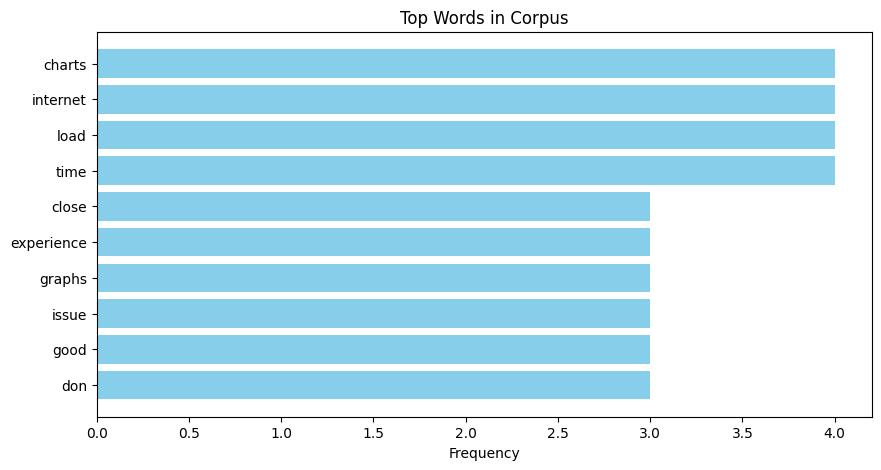

In [19]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances

# Load the data from CSV
df = pd.read_csv('sentiments.csv')  # Replace with your CSV file path

# Option 1: Completely remove the word "app"
# Uncomment this block if you want to remove all instances of "app"
# df['Comment'] = df['Comment'].str.replace(r'\bapp\b', '', regex=True)

# Option 2: Randomly reduce the occurrence of the word "app"
# Uncomment this block if you want to reduce the frequency of "app"
def reduce_word_occurrence(text, word, probability=0.8):
    # Split the text into words
    words = text.split()
    # Randomly remove the word with the given probability
    reduced_words = [w for w in words if not (w == word and random.random() < probability)]
    # Join the words back into a sentence
    return ' '.join(reduced_words)

# Apply the function to the 'Comment' column for random reduction
df['Comment'] = df['Comment'].apply(lambda x: reduce_word_occurrence(x, 'app', probability=0.8))

# Step 2: Create a bag-of-words representation
comments = df['Comment'][:5]  # Using the updated comments
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Step 3: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')

# --- Top Words Visualization ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(10)

# Plot top words
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top Words in Corpus')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()


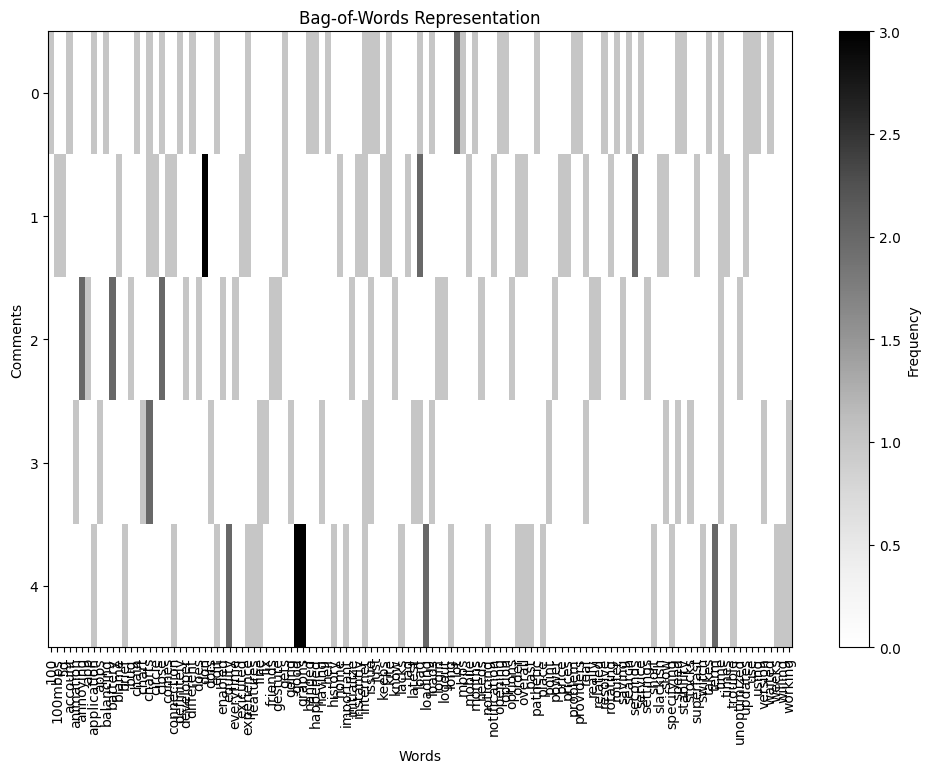

In [20]:
# --- Bag-of-Words Visualization --- 
# Convert bag-of-words to DataFrame for better visualization 
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()) 
plt.figure(figsize=(12, 8))
plt.imshow(bag_of_words_df, cmap='Greys', aspect='auto')
plt.colorbar(label='Frequency')
plt.title('Bag-of-Words Representation')
plt.xlabel('Words')
plt.ylabel('Comments')

# Set the correct number of y-ticks, corresponding to the number of comments you have selected
plt.xticks(ticks=np.arange(len(bag_of_words_df.columns)), labels=bag_of_words_df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(comments))[:5], labels=np.arange(len(comments)))  # Adjust y-ticks to match the number of comments
plt.show()

In [ ]:
# --- Agglomerative Clustering --- 
# Step 4: Perform Agglomerative Clustering 
agglo_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None) 
agglo_model.fit(distances) 
 
# Step 5: Plot Dendrogram for Agglomerative Clustering 
linkage_matrix_agglo = linkage(distances, method='ward') 
plt.figure(figsize=(10, 7)) 
dendrogram(linkage_matrix_agglo, labels=comments.values, leaf_rotation=90) 
plt.title('Agglomerative Clustering Dendrogram') 
plt.xlabel('Comments') 
plt.ylabel('Distance') 
plt.show() 
 
# --- Hierarchical Clustering --- 
# Step 6: Perform Hierarchical Clustering and plot dendrogram 
linkage_matrix_hierarchical = linkage(distances, method='ward') 
plt.figure(figsize=(10, 7)) 
dendrogram(linkage_matrix_hierarchical, labels=comments.values, 
leaf_rotation=90) 
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Comments') 
plt.ylabel('Distance') 
plt.show() 
 
# Optional: Cut the dendrogram to form flat clusters 
max_d = 5  # Adjust this threshold based on your dendrogram 
clusters_agglo = fcluster(linkage_matrix_agglo, max_d, criterion='distance') 
clusters_hierarchical = fcluster(linkage_matrix_hierarchical, max_d, 
criterion='distance') 
 
# Adding the cluster labels to the DataFrame 
df['agglo_cluster'] = clusters_agglo 
df['hierarchical_cluster'] = clusters_hierarchical 
 
# Print out the comments with their corresponding cluster labels 
print(df[['comments', 'agglo_cluster', 'hierarchical_cluster']])